# Modeling

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import time

In [2]:
X_train = pd.read_csv('X_train_v2.csv',index_col = 0)
X_test = pd.read_csv('X_test_v2.csv',index_col = 0)
y_train = pd.read_csv('y_train_v2.csv',index_col = 0)
y_test = pd.read_csv('y_test_v2.csv',index_col = 0)

In [3]:
lr = LinearRegression()

lr_fit_start = time.time()
lr.fit(X_train,y_train['favorites'])
lr_fit_end = time.time()
lr_fit_time = lr_fit_end - lr_fit_start

lr_pred_start = time.time()
lr_pred = lr.predict(X_test)
lr_pred_end = time.time()
lr_pred_time = lr_pred_end - lr_pred_start

mse_lr = mean_squared_error(y_test['favorites'],lr_pred)

print('The mse for the linear regression model is ' + str(round(mse_lr,3)))
print('The model fitting time is ' + str(round(lr_fit_time,3)))
print('The model prediction time is ' + str(round(lr_pred_time,3)))

The mse for the linear regression model is 3491299.105
The model fitting time is 0.659
The model prediction time is 0.006


In [4]:
lr2 = LinearRegression()
lr2.fit(X_train,y_train['retweets'])
print('R2 using favorites: ' + str(lr.score(X_test,y_test['favorites'])) + '\nR2 using retweets: ' + str(lr2.score(X_test,y_test['retweets'])))

R2 using favorites: 0.27644714055389574
R2 using retweets: 0.15593006719209757


In [5]:
knn = KNeighborsClassifier()

knn_fit_start = time.time()
knn.fit(X_train,y_train['favorites'])
knn_fit_end = time.time()
knn_fit_time = knn_fit_end - knn_fit_start

knn_pred_start = time.time()
knn_pred = knn.predict(X_test)
knn_pred_end = time.time()
knn_pred_time = knn_pred_end - knn_pred_start

mse_knn = mean_squared_error(y_test['favorites'],knn_pred)

print('The mse for the KNN model is ' + str(round(mse_knn,3)))
print('The model fitting time is ' + str(round(knn_fit_time,3)))
print('The model prediction time is ' + str(round(knn_pred_time,3)))

The mse for the KNN model is 4993206.518
The model fitting time is 0.681
The model prediction time is 5.261


In [6]:
rf = RandomForestClassifier()

rf_fit_start = time.time()
rf.fit(X_train,y_train['favorites'])
rf_fit_end = time.time()
rf_fit_time = rf_fit_end - rf_fit_start

rf_pred_start = time.time()
rf_pred = rf.predict(X_test)
rf_pred_end = time.time()
rf_pred_time = rf_pred_end - rf_pred_start

mse_rf = mean_squared_error(y_test['favorites'],rf_pred)

print('The mse for the random forest model is ' + str(round(mse_rf,3)))
print('The model fitting time is ' + str(round(rf_fit_time,3)))
print('The model prediction time is ' + str(round(rf_pred_time,3)))

The mse for the random forest model is 6465141.014
The model fitting time is 68.852
The model prediction time is 51.184


In [28]:
coefficients = pd.DataFrame(data=list(lr.coef_),index=X_train.columns.values,columns=['coeff'])

In [37]:
coefficients.sort_values(by='coeff',ascending=False).head(10)

,coeff
screen_name_awonderland,3948.413720
screen_name_porterrobinson,2076.353005
music,692.180187
screen_name_sanholobeats,637.239503
going,616.982964
album,569.339038
virtual,558.850753
miss,501.577474
song,417.108355
first,358.299692


In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [42]:
import warnings
warnings.filterwarnings("ignore")

params = {'alpha':(0.01,0.1,1),
         'l1_ratio':(0,0.5,1),
         'normalize':(True,False)}
elastic = ElasticNet()
grid = GridSearchCV(elastic,params)
grid.fit(X_train,y_train['favorites'])

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': (0.01, 0.1, 1), 'l1_ratio': (0, 0.5, 1),
                         'normalize': (True, False)})

In [45]:
grid.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1, normalize=True)

In [46]:
elastic = ElasticNet(alpha=0.1, l1_ratio=1, normalize=True)
elastic.fit(X_train,y_train['favorites'])

ElasticNet(alpha=0.1, l1_ratio=1, normalize=True)

In [47]:
coefficients = pd.DataFrame(data=list(elastic.coef_),index=X_train.columns.values,columns=['coeff'])
coefficients.sort_values(by='coeff',ascending=False).head(10)

,coeff
screen_name_awonderland,3847.854521
screen_name_porterrobinson,1988.782060
music,635.842530
screen_name_sanholobeats,550.346278
going,519.619575
album,503.997065
virtual,483.015332
miss,420.031050
song,360.222659
first,275.698762


In [48]:
elastic_pred = elastic.predict(X_test)
mean_squared_error(y_test['favorites'],elastic_pred)

3490805.3505559377

In [68]:
predict_vs_actual = pd.DataFrame(data={'pred': elastic_pred,'actual':y_test['favorites']})
predict_vs_actual['difference'] = abs(predict_vs_actual['actual'] - predict_vs_actual['pred'])
predict_vs_actual.sort_values(by='difference',ascending=False).head(10)

,pred,actual,difference
774,610.800870,40080,39469.199130
5538,2862.902832,30131,27268.097168
788,374.688536,19783,19408.311464
476,4216.593545,21126,16909.406455
10259,335.102107,17155,16819.897893
5323,2376.363791,16984,14607.636209
5302,2228.183567,16823,14594.816433
5297,2832.280578,17382,14549.719422
5614,2448.674317,16966,14517.325683
5477,2221.086075,16181,13959.913925


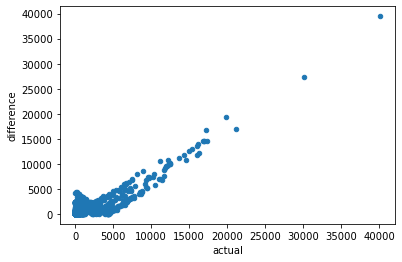

In [75]:
predict_vs_actual.plot.scatter(x='actual',y='difference')

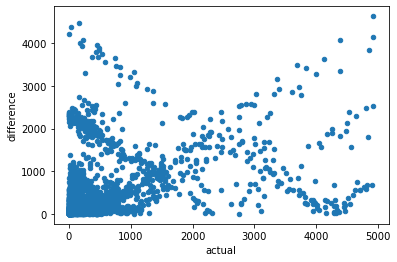

In [79]:
predict_vs_actual[predict_vs_actual['actual']<5000].plot.scatter(x='actual',y='difference')